# Exploratory Data Analysis

### Importing relevant libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
from adjustText import adjust_text
# %matplotlib inline
plt.style.use('seaborn')

In [5]:
data = pd.read_csv("data\\co_data.csv")
data.head()

,name,description,country,founding_date,relevancy
0,Pandora Car Rental,"Welcome to Pandora Car Rental, Car Hire and Ai...",United Kingdom,05/04/2011,0
1,SurplusMatch,SurplusMatch is an online marketplace for cont...,United Kingdom,01/01/2008,2
2,Gimenez Ganga,Giménez Ganga is a company that has been provi...,Switzerland,01/01/1959,0
3,SMC3,"Freight shippers, motor carriers, logistics se...",United States,01/01/1935,0
4,Much Asphalt,Much Asphalt is southern Africa’s commercial s...,South Africa,01/01/1965,0


In [6]:
data.tail()

,name,description,country,founding_date,relevancy
1995,James Fisher and Sons plc,James Fisher and Sons plc is a leading provide...,United Kingdom,01/01/1847,0
1996,AEG,The AEG brand offers a full range of products ...,United States,01/01/1887,1
1997,mov.e,Digital platform that enables sharing of elect...,Portugal,01/01/2018,2
1998,ambiHome,ambiHome is a fresh company based in Aachen/Ge...,Germany,01/01/2009,0
1999,Construirbarato,Construirbarato.com.br is an online platform t...,Brazil,01/01/2009,1


The datasets consists of four columns, containing company name, description, country, founding date and relevancy label. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2000 non-null   object
 1   description    2000 non-null   object
 2   country        2000 non-null   object
 3   founding_date  2000 non-null   object
 4   relevancy      2000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


### Couple of examples from dataset prior to preprocessing

In [8]:
data["description"][3]

'Freight shippers, motor carriers, logistics service providers and other supply chain professionals look to SMC³ for the technology, industry data, educational services and general know-how to achieve greater success in the transportation marketplace. The company is best known for its CzarLite base rates, which are used as a price benchmark in transportation agreements. Additionally SMC³ produces a range of enabling technologies that give shippers and carriers complete visibility into their transportation spend. Each January and June, SMC³ hosts a comprehensive supply chain conference that gives industry professionals an inside look into cost-saving trends and best business practices as well as timely economic and legislative updates.'

In [9]:
data["description"][1999]

'Construirbarato.com.br is an online platform that allows its users to search and compare prices of products and services related to construction. It was launched in 2009 and is based in Rio de Janeiro, Brazil.'

In [10]:
data["description"][0]

'Welcome to Pandora Car Rental, Car Hire and Airport Transfers based in Dalaman Turkey. \xa0We have a wide range of cars to suit all budgets and can deliver your car for free anytime day or night within the Dalaman locality.\r\n\r\n\r\nReasons to Book Car from Pandora Car Rental:\r\n\r\nUnlimited Milage\r\nVAT\r\nAll Local Taxes\r\nAirport Service Charge where applicable\r\n24 hours Road Service\r\nThird Party Insurance with NO Excess\r\nTheft Insurance with NO Excess\r\nFire Insurance with NO Excess\r\nFDW Insurance with NO Excess\r\nCDW Collision Damage Waiver with NO Excess\r\nTWH Tyre Windscreen Headlight Insurance with NO Excess\r\n3 Additional Drivers\r\nChild/Baby Seat (must be ordered)\r\nNo Hidden Extras\r\n\r\n\r\nAddress:\r\nHadrian Flats Number 4\xa0\r\nWellington Telford \r\nPin Code: TF11RQ\r\nTel:\xa0\xa0+ 44 776 558 66 77\xa0\r\nWebsite: http://www.dalamancarrental.com'

### Preprocessing the dataset

In [11]:
# downloading English stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

for ind, row in data.iterrows():
    text = row["description"]
    #websites, email and any punctuation cleaning
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    #removing stopwords
    text = [word for word in text if word not in stopwords]
    
    data.at[ind, "description"] = " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data["description"][0]

'welcome pandora car rental car hire airport transfers based dalaman turkey wide range cars suit budgets deliver car free anytime day night within dalaman localityreasons book car pandora car rentalunlimited milagevatall local taxesairport service charge applicable hours road servicethird party insurance excesstheft insurance excessfire insurance excessfdw insurance excesscdw collision damage waiver excesstwh tyre windscreen headlight insurance excess additional driverschildbaby seat must orderedno hidden extrasaddresshadrian flats number wellington telford pin code tfrqtel website'

In [13]:
data["description"][1999]

'construirbaratocombr online platform allows users search compare prices products services related construction launched based rio de janeiro brazil'

Creating additional columns such as founding year and word count of each company description

In [14]:
# creating founding year
data["founding_year"] = pd.DatetimeIndex(data["founding_date"]).year

# extracting word count
data["word_count"] = data.description.apply(lambda x: len(x.split(" "))) 

### Founding date distribution

Text(0.5, 1.0, 'Founding Dates')

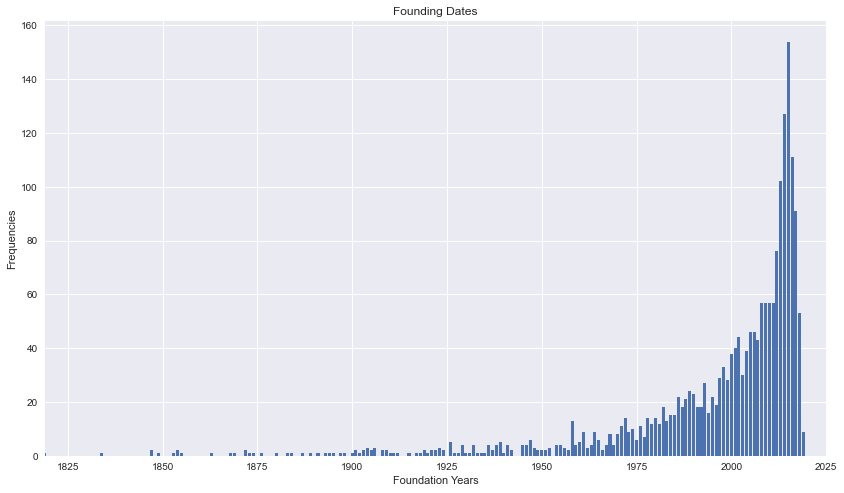

In [15]:
plt.figure(figsize=(14,8))

year_freq = data.groupby(["founding_year"])["name"].count().reset_index(name="frequencies")
plt.bar(year_freq["founding_year"], year_freq["frequencies"])
plt.xlim(1819, 2025)

plt.xlabel("Foundation Years")
plt.ylabel("Frequencies")
plt.title("Founding Dates")

We observe that most of the companies included in our dataset founded after 1975.

### Word count distribution

(0.0, 200.0)

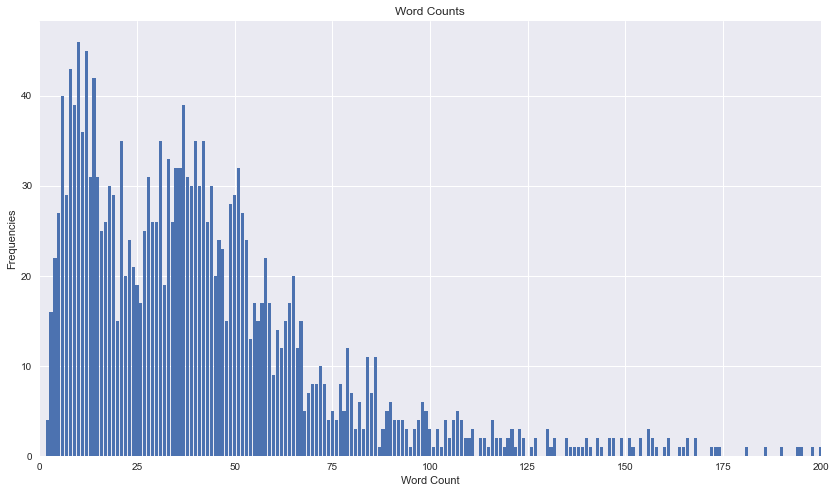

In [16]:
plt.figure(figsize=(14,8))
country_freq = data.groupby(["word_count"])["name"].count().reset_index(name="frequencies")
plt.bar(country_freq["word_count"], country_freq["frequencies"])
plt.xlabel("Word Count")
plt.ylabel("Frequencies")
plt.title("Word Counts")
plt.xlim(0, 200)

Let's have a look at top words used in the company description w.r.t founding year

In [45]:
# creating separate lists for the top 3 used words in the company descriptions
years = data.founding_year.drop_duplicates()
sorted_years = sorted(years)

top_1 = []
top_2 = []
top_3 = []

word_freqs = []
for year in tqdm(sorted_years):
    
    F = nltk.FreqDist([i for i in ' '.join(data.query(f'founding_year=={year}').description).split() if i not in stopwords])
    word_freqs.append(F)
        
    result = [i for i in F.most_common(3)]  
    
    top_1.append(result[0])
    top_2.append(result[1])
    top_3.append(result[2])

100%|██████████| 137/137 [00:02<00:00, 68.16it/s]


In [39]:
word_freqs

[FreqDist({'mail': 3, 'business': 3, 'company': 3, 'singapore': 2, 'logistics': 2, 'retail': 2, 'main': 2, 'awards': 2, 'postal': 2, 'service': 2, ...}),
 FreqDist({'equipment': 5, 'stedman': 3, 'size': 3, 'reduction': 3, 'parts': 3, 'machine': 2, 'company': 2, 'consistent': 2, 'product': 2, 'industry': 2, ...}),
 FreqDist({'gasag': 2, 'berliner': 2, 'gaswerke': 2, 'services': 2, 'gas': 2, 'ag': 1, 'provides': 1, 'utility': 1, 'company': 1, 'offers': 1, ...}),
 FreqDist({'ecom': 1, 'agroindustrial': 1, 'commodity': 1, 'merchant': 1, 'sustainable': 1, 'supply': 1, 'chain': 1, 'management': 1, 'company': 1}),
 FreqDist({'readymixed': 2, 'concrete': 2, 'vicat': 1, 'produces': 1, 'sells': 1, 'cement': 1, 'aggregate': 1, 'products': 1, 'worldwide': 1, 'offers': 1, ...}),
 FreqDist({'construction': 7, 'natie': 5, 'katoen': 3, 'logistics': 3, 'services': 3, 'industries': 2, 'port': 2, 'service': 2, 'management': 2, 'engineering': 2, ...}),
 FreqDist({'right': 2, 'us': 2, 'door': 2, 'strategic

Now, we obtained word occurence counts per year from 1819-2019. Let's plot them to visually inspect them.

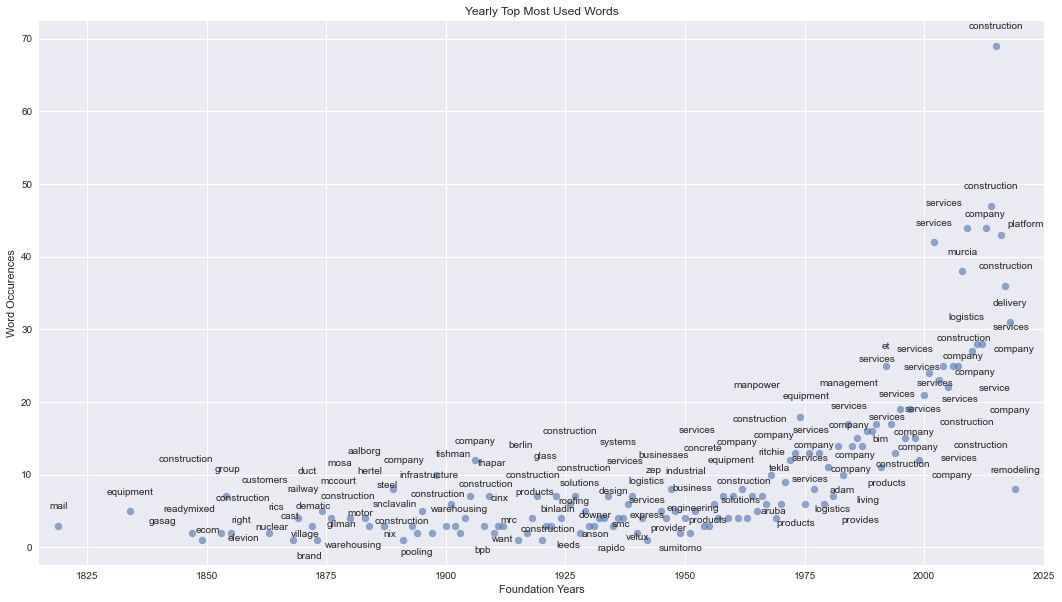

In [52]:
# creating scatter plot for the top used words.

words_1  = [i[0] for i in top_1]
counts_1 = [i[1] for i in top_1]

plt.figure(figsize=(18,10))
plt.scatter(x=sorted_years, y=counts_1, alpha=0.6)
plt.xlim(1815, 2025)
plt.xlabel("Foundation Years")
plt.ylabel("Word Occurences")
plt.title("Yearly Top Most Used Words")

annotations_1 = []
    
for i in range(len(sorted_years)):
    annotations_1.append(plt.annotate(words_1[i], (sorted_years[i], counts_1[i] + 2)))
    
adjust_text(annotations_1, x=sorted_years, y=counts_1, autoalign='y',
        only_move={'points':'y', 'text':'xy'}, force_points=0.15)      
plt.show()

In [ ]:
words_2  = [i[0] for i in top_2]
counts_2 = [i[1] for i in top_2]

# sorted_dates = sorted(data["founding_year"])
plt.figure(figsize=(18,10))
plt.scatter(x=sorted_years, y=counts_2, alpha=0.6)
plt.xlim(1815, 2025)
plt.xlabel("Foundation Years")
plt.ylabel("Word Occurences")
plt.title("Yearly Second Most Used Words")

annotations_2= []

for i in range(len(sorted_years)):
    annotations_2.append(plt.annotate(words_2[i], (sorted_years[i], counts_2[i] + 2)))
    
adjust_text(annotations_2, x=sorted_years, y=counts_2, autoalign='y',
        only_move={'points':'y', 'text':'xy'}, force_points=0.15)        
plt.show()

In [ ]:
words_3  = [i[0] for i in top_3]
counts_3 = [i[1] for i in top_3]

# sorted_dates = sorted(data["founding_year"])
plt.figure(figsize=(18,10))
plt.scatter(x=sorted_years, y=counts_3, alpha=0.6)
plt.xlim(1815, 2025)
plt.xlabel("Foundation Years")
plt.ylabel("Word Occurences")
plt.title("Yearly Third Most Used Words")

annotations_3= []

    
for i in range(len(sorted_years)):
    annotations_3.append(plt.annotate(words_3[i], (sorted_years[i], counts_3[i] + 2)))
    
adjust_text(annotations_3, x=sorted_years, y=counts_3, autoalign='y',
        only_move={'points':'y', 'text':'xy'}, force_points=0.15)        
plt.show()

Let's have a look at the most common words in the corpus.

In [19]:
from collections import Counter

corpus = []
for i in range(len(data)):
    for word in data.description[i].split():
        corpus.append(word)
   
word_count = Counter(corpus)
word_count.most_common(30)

[('services', 871),
 ('company', 856),
 ('construction', 843),
 ('management', 581),
 ('logistics', 534),
 ('service', 505),
 ('solutions', 460),
 ('provides', 460),
 ('products', 438),
 ('customers', 366),
 ('platform', 342),
 ('industry', 332),
 ('business', 322),
 ('also', 304),
 ('offers', 293),
 ('software', 293),
 ('project', 278),
 ('technology', 276),
 ('delivery', 258),
 ('equipment', 254),
 ('companies', 254),
 ('building', 251),
 ('design', 248),
 ('projects', 247),
 ('engineering', 240),
 ('quality', 224),
 ('include', 220),
 ('provide', 217),
 ('based', 216),
 ('new', 215)]

Text(0.5, 1.0, 'Most Common Top 30 Words in Raw Corpus')

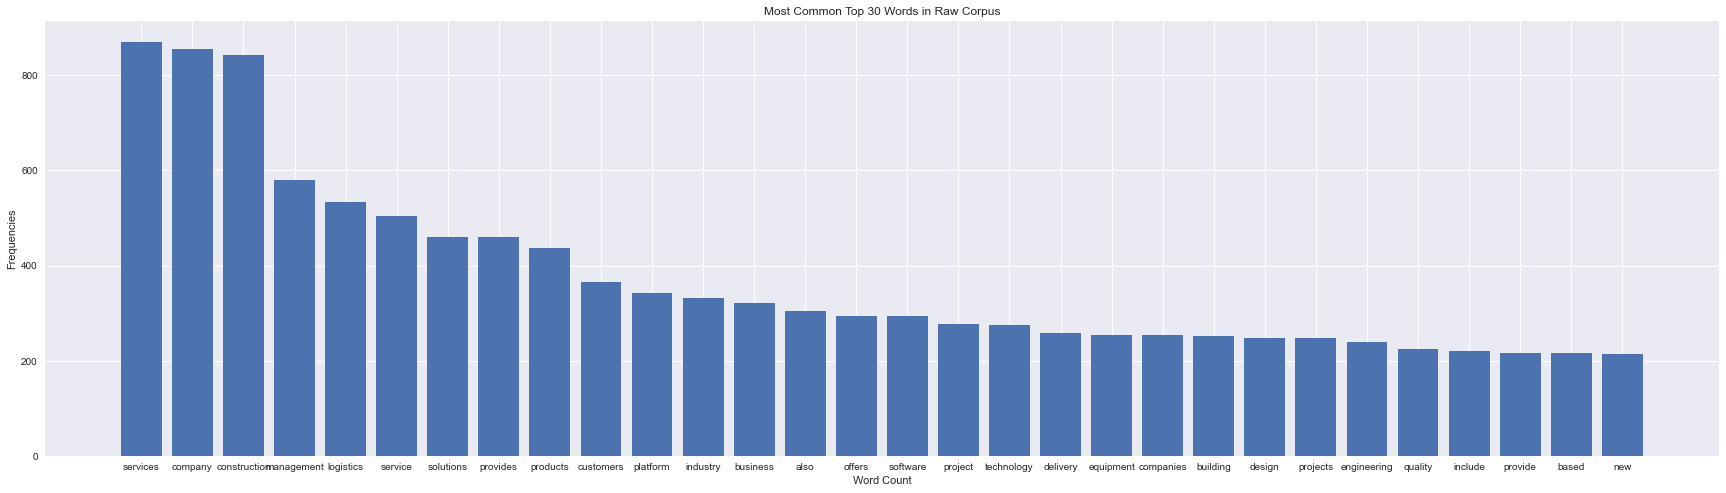

In [22]:
most_common_words = []
most_common_count = []

for i in range(len(word_count.most_common(30))):
    most_common_words.append(word_count.most_common(30)[i][0])
    most_common_count.append(word_count.most_common(30)[i][1])
    
plt.figure(figsize=(30,8))
plt.bar(most_common_words, most_common_count)
plt.xlabel("Word Count")
plt.ylabel("Frequencies")
plt.title("Most Common Top 30 Words in Raw Corpus")

I am going to extend preexisting English stopwords list with the top 20 generic words from our corpus.

In [31]:
most_common_words

['services',
 'company',
 'construction',
 'management',
 'logistics',
 'service',
 'solutions',
 'provides',
 'products',
 'customers',
 'platform',
 'industry',
 'business',
 'also',
 'offers',
 'software',
 'project',
 'technology',
 'delivery',
 'equipment',
 'companies',
 'building',
 'design',
 'projects',
 'engineering',
 'quality',
 'include',
 'provide',
 'based',
 'new']

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
print("Initial Stopwords:", len(stopwords))
stopwords.extend(most_common_words)
print("After Extension:", len(stopwords))

Initial Stopwords: 179
After Extension: 209


In [25]:

data = pd.read_csv("data\\co_data.csv")

for ind, row in data.iterrows():
    text = row["description"]
    #websites, email and any punctuation cleaning
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    #removing stopwords
    text = [word for word in text if word not in stopwords]
    
    data.at[ind, "description"] = " ".join(text)
# creating founding year
data["founding_year"] = pd.DatetimeIndex(data["founding_date"]).year


In [26]:
# creating separate lists for the top 3 used words in the company descriptions
years = data.founding_year.drop_duplicates()
sorted_years = sorted(years)

top_1 = []
top_2 = []
top_3 = []

word_freqs = []
for year in tqdm(sorted_years):
    
    F = nltk.FreqDist([i for i in ' '.join(data.query(f'founding_year=={year}').description).split() if i not in stopwords])
    word_freqs.append(F)
        
    result = [i for i in F.most_common(3)]  
    
    top_1.append(result[0])
    top_2.append(result[1])
    top_3.append(result[2])

100%|██████████| 137/137 [00:00<00:00, 149.84it/s]


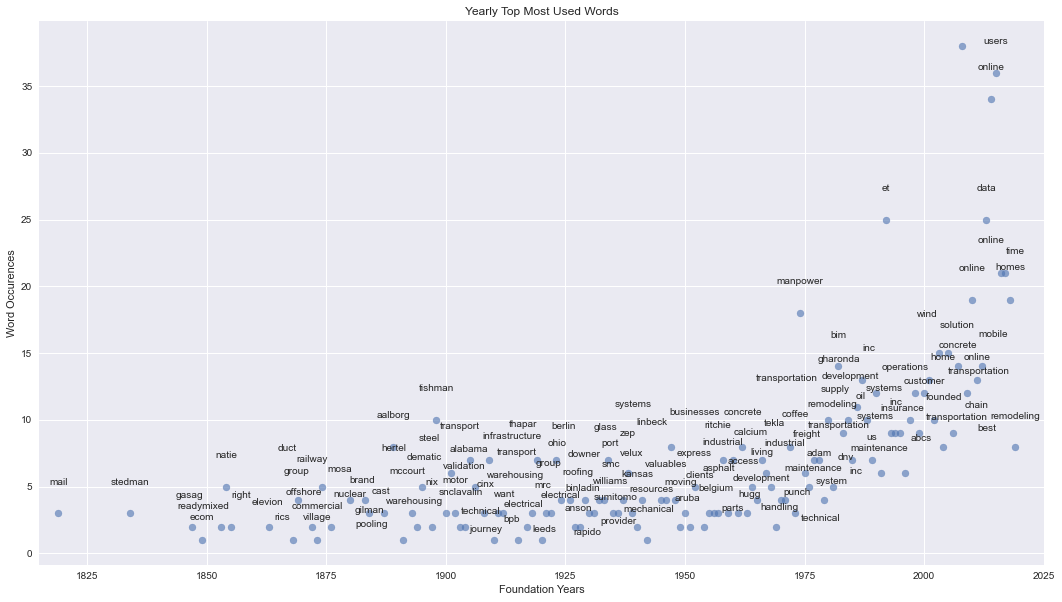

In [28]:
# creating scatter plot for the top used words.

words_1  = [i[0] for i in top_1]
counts_1 = [i[1] for i in top_1]

plt.figure(figsize=(18,10))
plt.scatter(x=sorted_years, y=counts_1, alpha=0.6)
plt.xlim(1815, 2025)
plt.xlabel("Foundation Years")
plt.ylabel("Word Occurences")
plt.title("Yearly Top Most Used Words")

annotations_1 = []
    
for i in range(len(sorted_years)):
    annotations_1.append(plt.annotate(words_1[i], (sorted_years[i], counts_1[i] + 2)))
    
adjust_text(annotations_1, x=sorted_years, y=counts_1, autoalign='y',
        only_move={'points':'y', 'text':'xy'}, force_points=0.15)      
plt.show()